# Modeling

Let's try to create several models, tune them and then choose best or try to ensemble them in better model.
 - Decicion tree
 - Random forest
 - AdaBoost
 - Linear Regression
 - Ensemble them!
 - Maybe something else?

In [99]:
import pandas as pd

df_expectancy = pd.read_csv('life_expectancy_cleaned.csv')
# for ensembly
regressors = []

In [100]:
from sklearn.model_selection import train_test_split


X, y = df_expectancy.drop(columns='Life expectancy'), df_expectancy['Life expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, train_size=0.5)

### Decision Tree

uh.

In [101]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

parameters = {
    'criterion' : ['mse', 'mae'],
    'max_depth' : range(3, 35)
}

grid = GridSearchCV(DecisionTreeRegressor(random_state=666), parameters)
grid.fit(X_train, y_train)
mean_squared_error(y_valid, grid.predict(X_valid))

8.000944847364432

In [102]:
print("Best parameters:", grid.best_params_)
regressors.append(DecisionTreeRegressor(random_state=666, **grid.best_params_).fit(X_train, y_train))
print(regressors)

Best parameters: {'criterion': 'mse', 'max_depth': 22}
[DecisionTreeRegressor(max_depth=22, random_state=666)]


### Random forest

A little better.

In [103]:
from sklearn.ensemble import RandomForestRegressor

parameters = {
    'n_estimators' : range(100, 210, 25),
    'max_depth' : range(1, 10),
}

grid = GridSearchCV(RandomForestRegressor(random_state=666, n_jobs=-1), parameters)
grid.fit(X_train, y_train)
mean_squared_error(y_valid, grid.predict(X_valid))

4.760838445501074

In [104]:
print("Best parameters:", grid.best_params_)
regressors.append(RandomForestRegressor(random_state=666, n_jobs=-1, **grid.best_params_).fit(X_train, y_train))
print(regressors)

Best parameters: {'max_depth': 9, 'n_estimators': 200}
[DecisionTreeRegressor(max_depth=22, random_state=666), RandomForestRegressor(max_depth=9, n_estimators=200, n_jobs=-1,
                      random_state=666)]


### AdaBoost

In [105]:
from sklearn.ensemble import AdaBoostRegressor

parameters = {
    'n_estimators' : range(100, 210, 25),
    'learning_rate' : [0.01, 0.05, 0.1, 0.3, 0.5, 1],
    'loss' : ['linear', 'square', 'exponential']
}

grid = GridSearchCV(AdaBoostRegressor(random_state=666), parameters)
grid.fit(X_train, y_train)
mean_squared_error(y_valid, grid.predict(X_valid))

9.006748334620438

In [106]:
print("Best parameters:", grid.best_params_)
regressors.append(AdaBoostRegressor(random_state=666, **grid.best_params_).fit(X_train, y_train))
print(regressors)

Best parameters: {'learning_rate': 1, 'loss': 'square', 'n_estimators': 100}
[DecisionTreeRegressor(max_depth=22, random_state=666), RandomForestRegressor(max_depth=9, n_estimators=200, n_jobs=-1,
                      random_state=666), AdaBoostRegressor(learning_rate=1, loss='square', n_estimators=100,
                  random_state=666)]


### Linear regression

That's not really good.

In [107]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(n_jobs=-1)
lr.fit(X_train, y_train)
mean_squared_error(y_valid, lr.predict(X_valid))

16.13187320700836

In [108]:
regressors.append(lr)
print(regressors)

[DecisionTreeRegressor(max_depth=22, random_state=666), RandomForestRegressor(max_depth=9, n_estimators=200, n_jobs=-1,
                      random_state=666), AdaBoostRegressor(learning_rate=1, loss='square', n_estimators=100,
                  random_state=666), LinearRegression(n_jobs=-1)]


### Ensemble models

In [109]:
from sklearn.ensemble import VotingRegressor

models = [('tree', regressors[0]), ('forest', regressors[1]), ('adaboost', regressors[2]), ('lr', regressors[3])]

ensemble = VotingRegressor(estimators=models)
ensemble.fit(X_train, y_train)
mean_squared_error(y_valid, ensemble.predict(X_valid))

6.150774519776462

In [110]:
regressors.append(ensemble)

### Test against test data

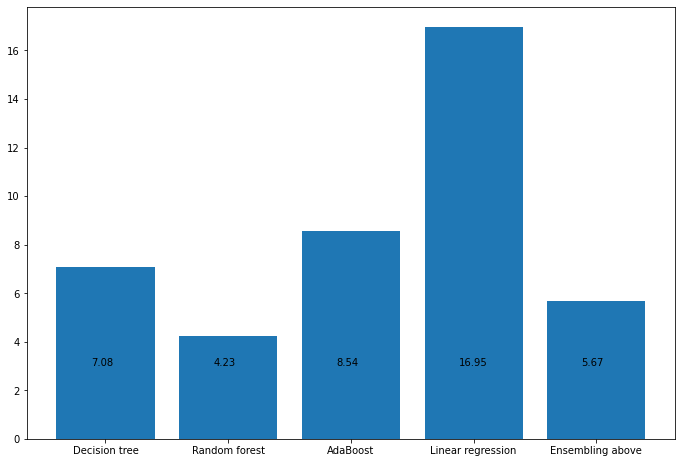

In [129]:
import matplotlib.pyplot as plt
from math import floor

models = ['Decision tree', 'Random forest', 'AdaBoost', 'Linear regression', 'Ensembling above']
accuracies = []
for reg in regressors:
    accuracies.append(mean_squared_error(y_test, reg.predict(X_test)))

fig = plt.figure()
ax = fig.add_axes([0, 0, 1.5, 1.5])
ax.bar(models, accuracies)
for i, v in enumerate(accuracies):
    ax.text(i - 0.12, 3, str(round(v, 2)))
plt.show()